In [12]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0)

def show_tensor_images(image_tensor,num_images=25,size=(1,28,28)):
    
    image_unflat=image_tensor.detach().cpu().view(-1,*size)
    image_grid=make_grid(image_unflat[:num_images],nrow=5)
    plt.imshow(image_grid.permute(1,2,0).squeeze())
    plt.show()
    

In [13]:
def get_generator_block(input_dim,output_dim):
    return nn.Sequential(
    nn.Linear(input_dim,output_dim),
    nn.BatchNorm1d(output_dim),
    nn.ReLU(inplace=True),
    )

In [14]:
class Generator(nn.Module):
    
    def __init__(self,z_dim=10,im_dim=28*28,hidden_dim=128):
        super(Generator,self).__init__()
        
        self.gen=nn.Sequential(
           get_generator_block(z_dim,hidden_dim),
            get_generator_block(hidden_dim,hidden_dim*2),
             get_generator_block(hidden_dim*2,hidden_dim*4),
            get_generator_block(hidden_dim*4,hidden_dim*8),
            nn.Linear(hidden_dim*8,im_dim),
            nn.Sigmoid(),
            
        )
    
    def forward(self,noise):
        return self.gen(noise)

In [15]:
def get_noise(n_samples,z_dim,device='cpu'):
    return torch.randn(n_samples,z_dim,device=device)

In [16]:
def get_discriminator_block(input_dim,output_dim):
    return nn.Sequential(
    nn.Linear(input_dim,output_dim),
    nn.LeakyReLU(negative_slope=0.2),
    )

In [17]:
class Discriminator(nn.Module):
    def __init__(self,in_dim=784,hidden_dim=128):
        super(Discriminator,self).__init__()
        self.disc=nn.Sequential(
        get_discriminator_block(in_dim,hidden_dim*4),
        get_discriminator_block(hidden_dim*4,hidden_dim*2),
        get_discriminator_block(hidden_dim*2,hidden_dim),
        nn.Linear(hidden_dim,1),
        )
        
    def forward(self,image):
        return self.disc(image)
    

In [18]:
criterion = nn.BCEWithLogitsLoss()
n_epochs=200
z_dim=64
display_step=500
batch_size=128
lr=0.00001
device='cuda'

dataloder=DataLoader(
    MNIST('.',download=True,transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True
)

In [19]:
gen=Generator(z_dim).to(device)
gen_opt=torch.optim.Adam(gen.parameters(),lr=lr)
disc=Discriminator().to(device)
disc_opt=torch.optim.Adam(disc.parameters(),lr=lr)


In [23]:
def get_disc_loss(gen,disc,criterion,real,num_images,z_dim,device):
    noise=get_noise(num_images,z_dim,device=device)
    gen_images=gen(noise).detach()
    fake_pred=disc(gen_images)
    real_pred=disc(real)
    
    loss_fake=criterion(fake_pred,torch.zeros_like(fake_pred))
    loss_real=criterion(real_pred,torch.ones_like(real_pred))
    disc_loss=(loss_fake+loss_real)/2
    return disc_loss
    

In [21]:
def get_gen_loss(gen,disc,criterion,num_images,z_dim,device):
    noise=get_noise(num_images,z_dim,device=device)
    gen_images=gen(noise)
    fake_pred=disc(gen_images)
    gen_loss=criterion(fake_pred,torch.ones_like(fake_pred))
    return gen_loss

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step500: Generator loss:1.3902117813825607,Discriminator loss:0.41834681463241635


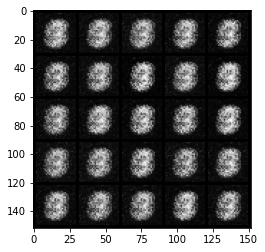

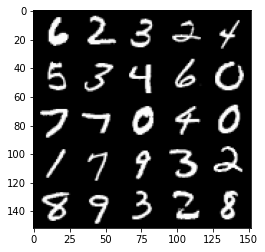

  0%|          | 0/469 [00:00<?, ?it/s]

Step1000: Generator loss:1.674352036476137,Discriminator loss:0.29926192870736107


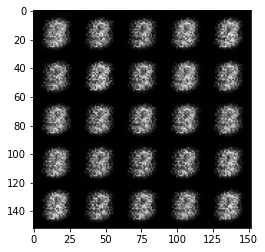

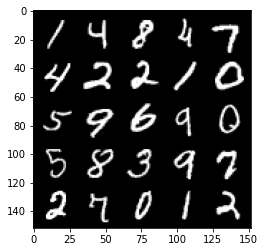

  0%|          | 0/469 [00:00<?, ?it/s]

Step1500: Generator loss:1.9636341733932483,Discriminator loss:0.1738955629169942


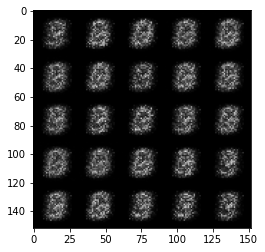

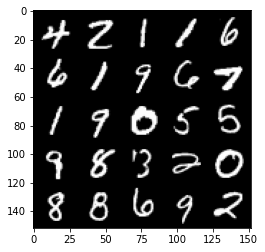

  0%|          | 0/469 [00:00<?, ?it/s]

Step2000: Generator loss:1.7803209474086767,Discriminator loss:0.1947408507764338


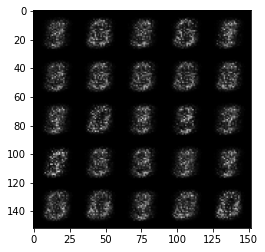

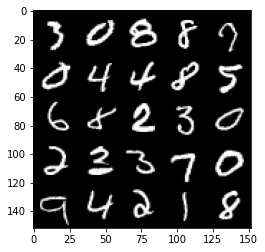

  0%|          | 0/469 [00:00<?, ?it/s]

Step2500: Generator loss:1.7482102274894713,Discriminator loss:0.1937372318506241


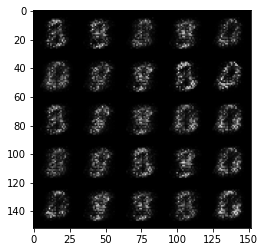

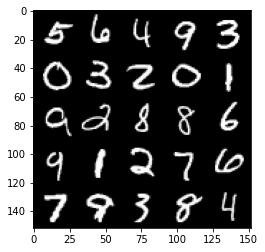

  0%|          | 0/469 [00:00<?, ?it/s]

Step3000: Generator loss:2.055506547689439,Discriminator loss:0.14418815904855722


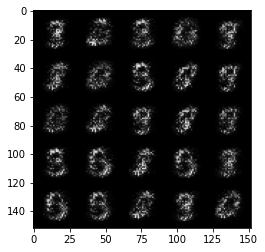

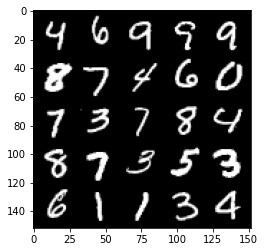

  0%|          | 0/469 [00:00<?, ?it/s]

Step3500: Generator loss:2.475745095252991,Discriminator loss:0.12280494999885556


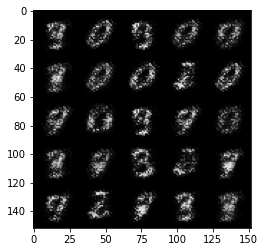

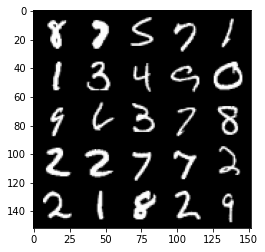

  0%|          | 0/469 [00:00<?, ?it/s]

Step4000: Generator loss:2.712251854419705,Discriminator loss:0.12243900552392013


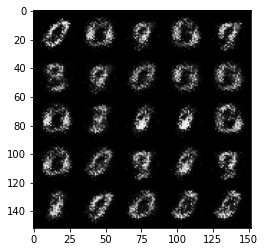

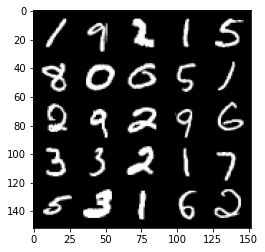

  0%|          | 0/469 [00:00<?, ?it/s]

Step4500: Generator loss:3.101412655830384,Discriminator loss:0.10289906370639798


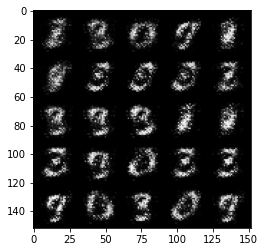

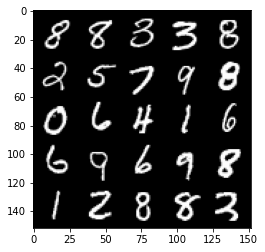

  0%|          | 0/469 [00:00<?, ?it/s]

Step5000: Generator loss:3.460022171974183,Discriminator loss:0.08362495735287666


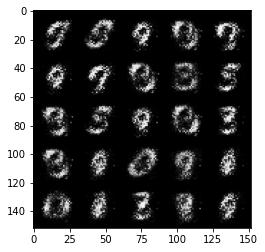

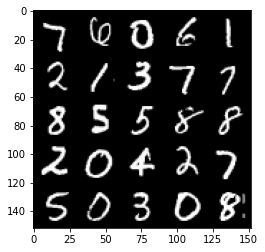

  0%|          | 0/469 [00:00<?, ?it/s]

Step5500: Generator loss:3.540655730247494,Discriminator loss:0.07442696989327673


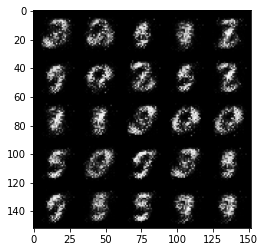

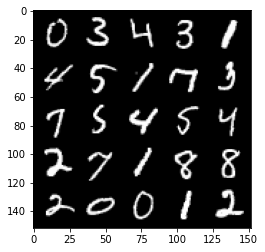

  0%|          | 0/469 [00:00<?, ?it/s]

Step6000: Generator loss:3.745976691722867,Discriminator loss:0.07558115930855272


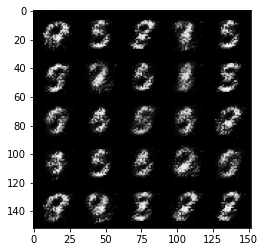

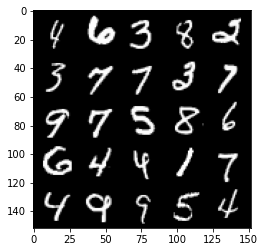

  0%|          | 0/469 [00:00<?, ?it/s]

Step6500: Generator loss:3.7165354809761033,Discriminator loss:0.07115215170383458


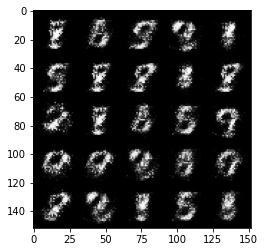

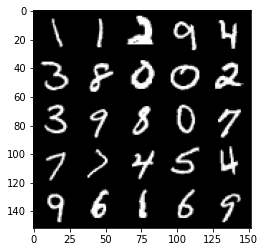

  0%|          | 0/469 [00:00<?, ?it/s]

Step7000: Generator loss:3.8730357198715217,Discriminator loss:0.05794198563694955


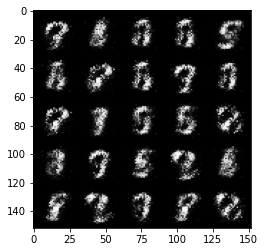

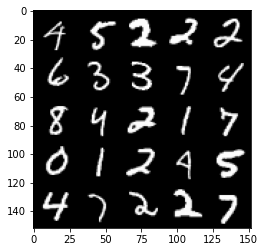

  0%|          | 0/469 [00:00<?, ?it/s]

Step7500: Generator loss:3.948668766498565,Discriminator loss:0.05227261721342803


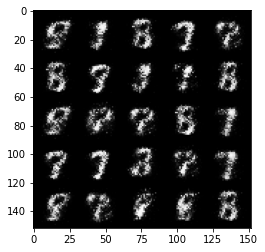

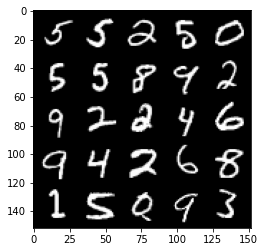

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step8000: Generator loss:3.8979061636924746,Discriminator loss:0.06385337084531784


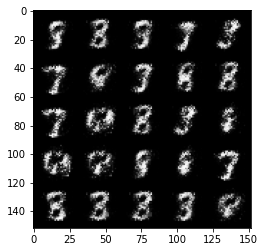

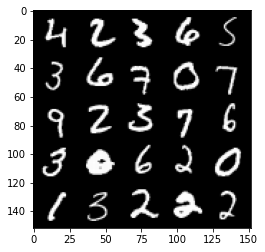

  0%|          | 0/469 [00:00<?, ?it/s]

Step8500: Generator loss:3.8328414273262035,Discriminator loss:0.06001339033991096


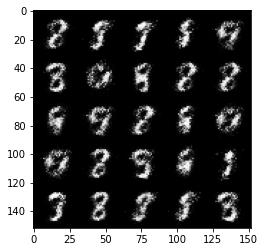

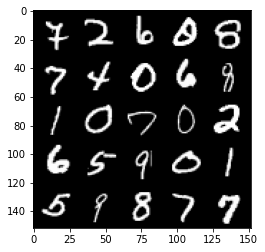

  0%|          | 0/469 [00:00<?, ?it/s]

Step9000: Generator loss:3.8992126884460445,Discriminator loss:0.06492321674525739


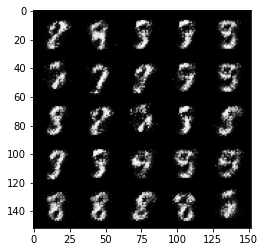

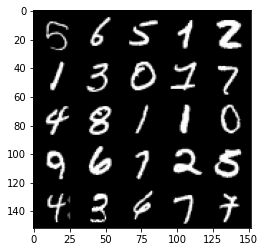

  0%|          | 0/469 [00:00<?, ?it/s]

Step9500: Generator loss:3.8436324067115772,Discriminator loss:0.07306832122802734


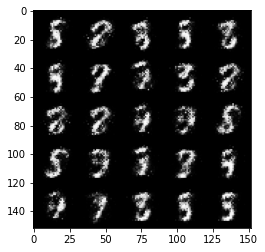

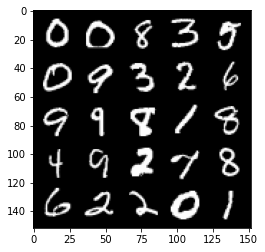

  0%|          | 0/469 [00:00<?, ?it/s]

Step10000: Generator loss:3.8595175266265858,Discriminator loss:0.06775166869908571


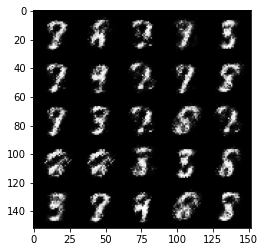

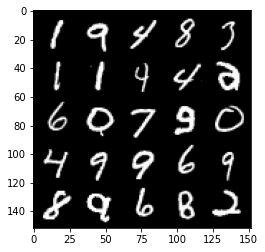

  0%|          | 0/469 [00:00<?, ?it/s]

Step10500: Generator loss:4.151930588245389,Discriminator loss:0.059607818219810725


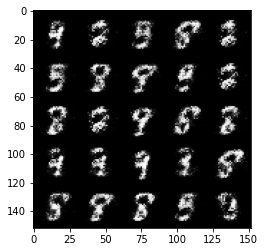

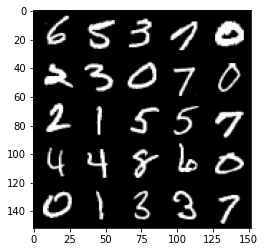

  0%|          | 0/469 [00:00<?, ?it/s]

Step11000: Generator loss:4.122648529052733,Discriminator loss:0.06115008183941242


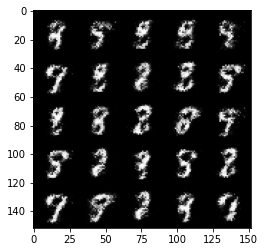

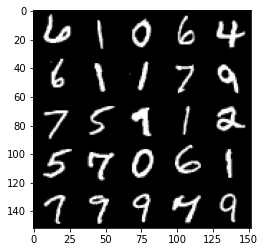

  0%|          | 0/469 [00:00<?, ?it/s]

Step11500: Generator loss:3.838067362308505,Discriminator loss:0.07550415528565635


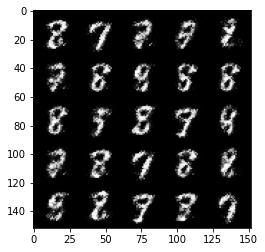

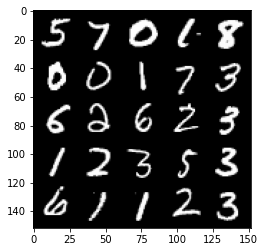

  0%|          | 0/469 [00:00<?, ?it/s]

Step12000: Generator loss:3.777551069259645,Discriminator loss:0.08138744845986365


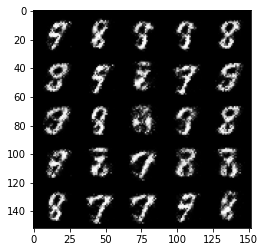

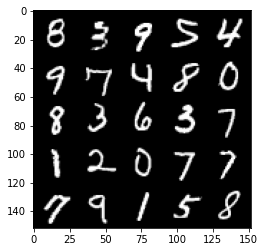

  0%|          | 0/469 [00:00<?, ?it/s]

Step12500: Generator loss:3.864473167419433,Discriminator loss:0.08382183002680538


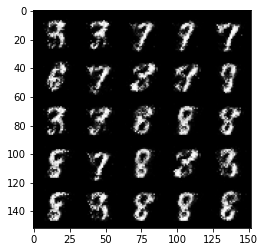

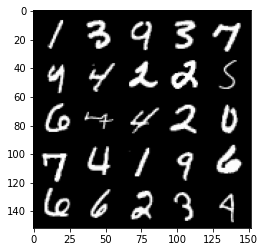

  0%|          | 0/469 [00:00<?, ?it/s]

Step13000: Generator loss:4.060944918632506,Discriminator loss:0.08169261734932658


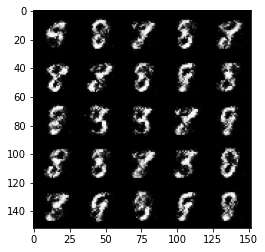

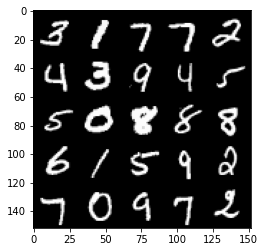

  0%|          | 0/469 [00:00<?, ?it/s]

Step13500: Generator loss:3.923242955684665,Discriminator loss:0.09284183233231304


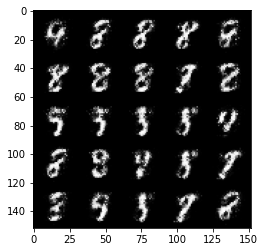

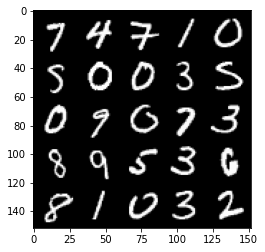

  0%|          | 0/469 [00:00<?, ?it/s]

Step14000: Generator loss:3.6157595624923697,Discriminator loss:0.10682889150828123


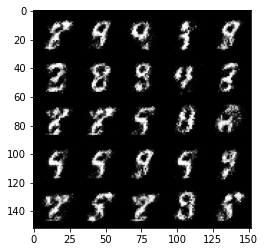

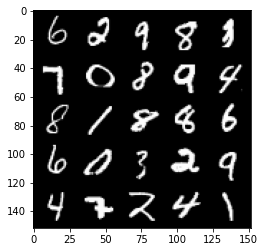

  0%|          | 0/469 [00:00<?, ?it/s]

Step14500: Generator loss:3.9415289225578336,Discriminator loss:0.0937685452774167


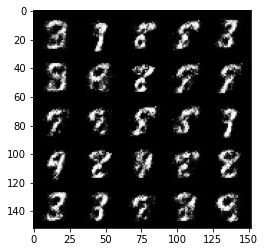

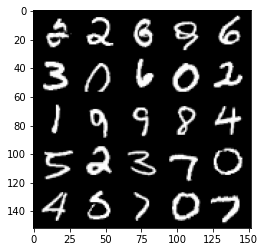

  0%|          | 0/469 [00:00<?, ?it/s]

Step15000: Generator loss:3.707298742771148,Discriminator loss:0.10664918400347234


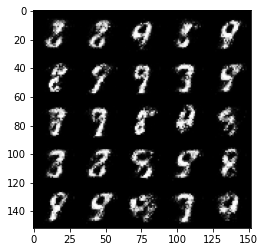

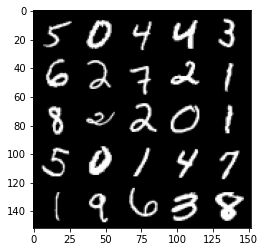

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step15500: Generator loss:3.601393102645876,Discriminator loss:0.10680394872277973


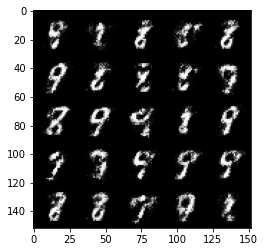

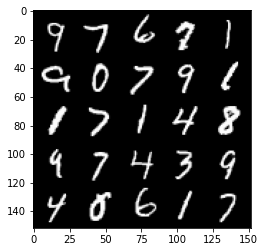

  0%|          | 0/469 [00:00<?, ?it/s]

Step16000: Generator loss:3.5433403253555276,Discriminator loss:0.11411481705307952


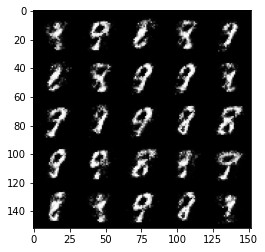

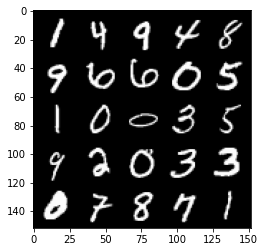

  0%|          | 0/469 [00:00<?, ?it/s]

Step16500: Generator loss:3.5628288507461527,Discriminator loss:0.11033964833617205


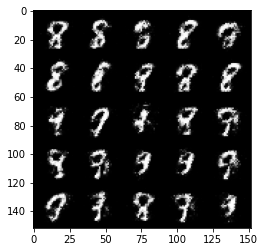

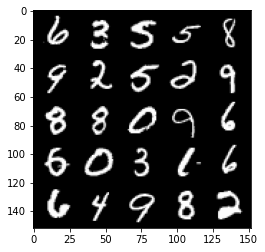

  0%|          | 0/469 [00:00<?, ?it/s]

Step17000: Generator loss:3.4034993100166346,Discriminator loss:0.12238082717359064


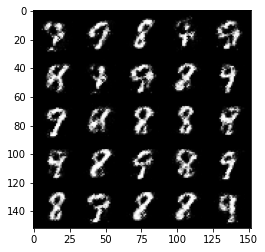

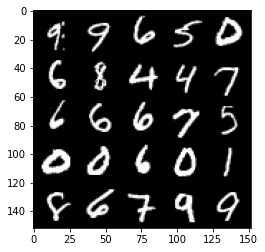

  0%|          | 0/469 [00:00<?, ?it/s]

Step17500: Generator loss:3.3912655143737758,Discriminator loss:0.1261405442953111


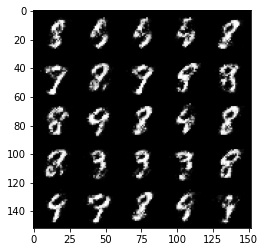

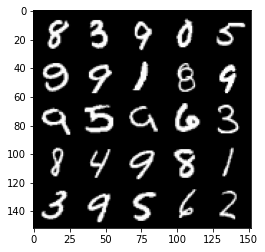

  0%|          | 0/469 [00:00<?, ?it/s]

Step18000: Generator loss:3.412814263820648,Discriminator loss:0.15634730285406115


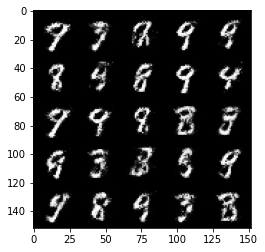

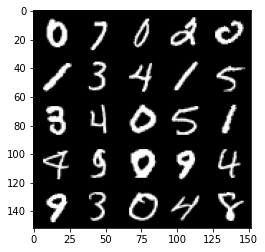

  0%|          | 0/469 [00:00<?, ?it/s]

Step18500: Generator loss:3.215994440555572,Discriminator loss:0.15972291360795496


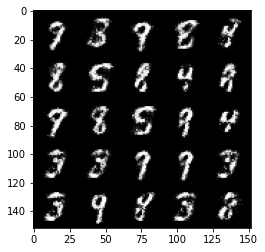

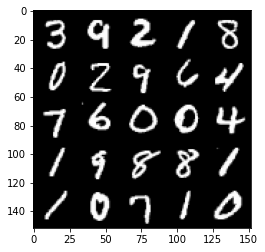

  0%|          | 0/469 [00:00<?, ?it/s]

Step19000: Generator loss:3.194570491790772,Discriminator loss:0.16115601842105376


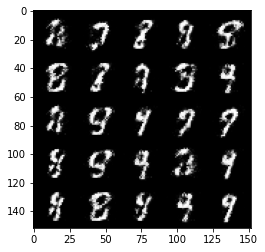

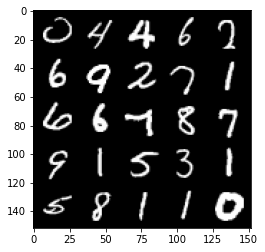

  0%|          | 0/469 [00:00<?, ?it/s]

Step19500: Generator loss:3.109714806556704,Discriminator loss:0.16306063561141518


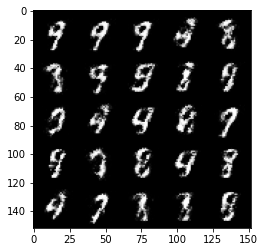

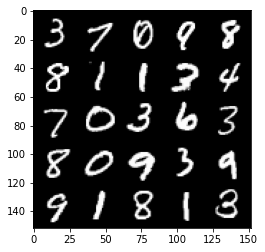

  0%|          | 0/469 [00:00<?, ?it/s]

Step20000: Generator loss:3.035755546569824,Discriminator loss:0.17690468040108678


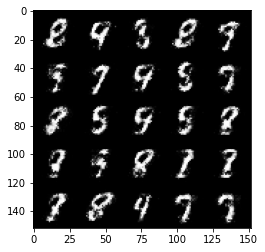

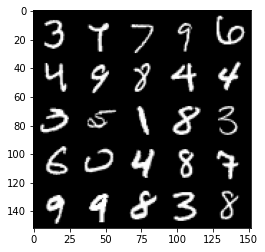

  0%|          | 0/469 [00:00<?, ?it/s]

Step20500: Generator loss:3.078259571552281,Discriminator loss:0.17146089011430748


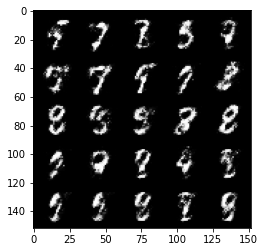

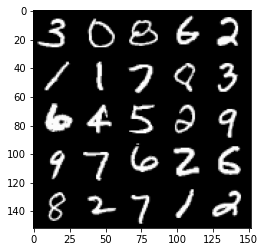

  0%|          | 0/469 [00:00<?, ?it/s]

Step21000: Generator loss:3.144118863582612,Discriminator loss:0.16564572049677362


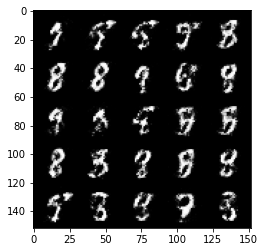

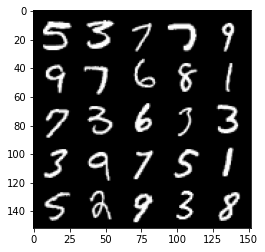

  0%|          | 0/469 [00:00<?, ?it/s]

Step21500: Generator loss:3.067064379692077,Discriminator loss:0.1754328722953798


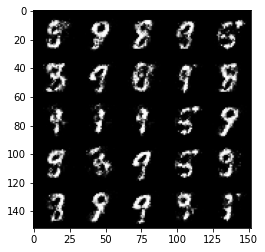

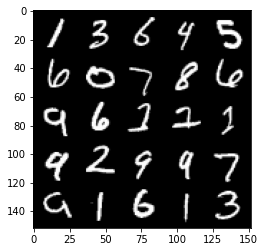

  0%|          | 0/469 [00:00<?, ?it/s]

Step22000: Generator loss:2.78538556623459,Discriminator loss:0.21262006720900556


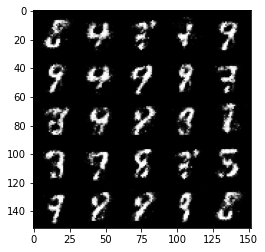

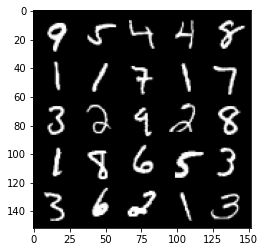

  0%|          | 0/469 [00:00<?, ?it/s]

Step22500: Generator loss:2.896190500736237,Discriminator loss:0.18505732423067095


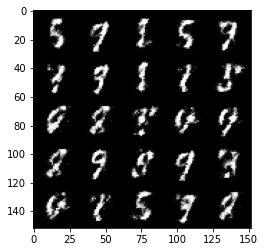

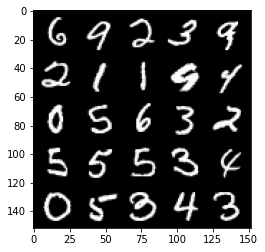

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step23000: Generator loss:2.927604927539825,Discriminator loss:0.20057208837568774


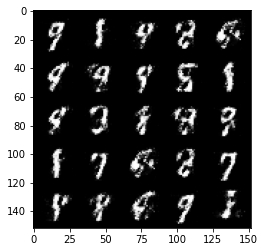

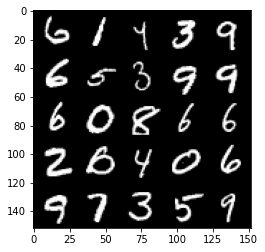

  0%|          | 0/469 [00:00<?, ?it/s]

Step23500: Generator loss:2.9015215158462477,Discriminator loss:0.18853056514263167


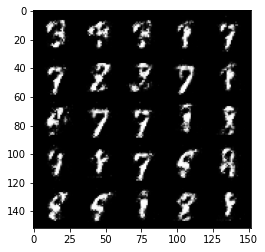

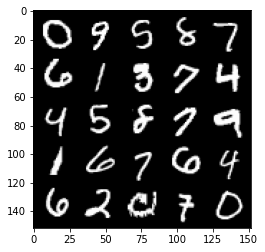

  0%|          | 0/469 [00:00<?, ?it/s]

Step24000: Generator loss:3.0031951293945287,Discriminator loss:0.18105331854522227


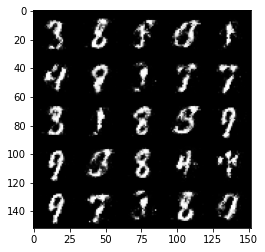

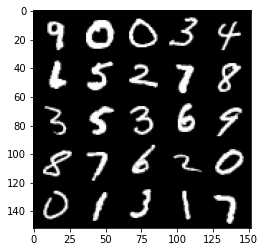

  0%|          | 0/469 [00:00<?, ?it/s]

Step24500: Generator loss:2.940473910808566,Discriminator loss:0.19475568909943097


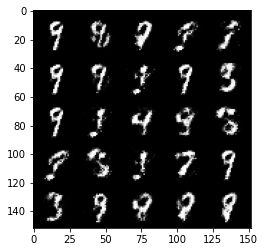

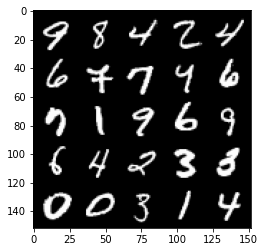

  0%|          | 0/469 [00:00<?, ?it/s]

Step25000: Generator loss:2.912921989440919,Discriminator loss:0.19389532500505444


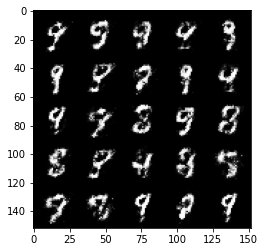

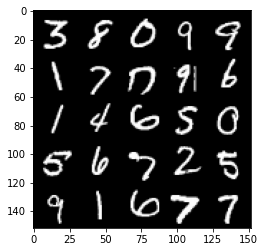

  0%|          | 0/469 [00:00<?, ?it/s]

Step25500: Generator loss:2.779374438762664,Discriminator loss:0.2313696682155135


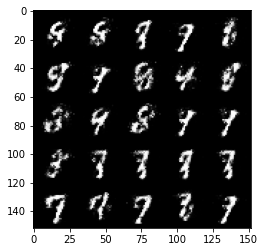

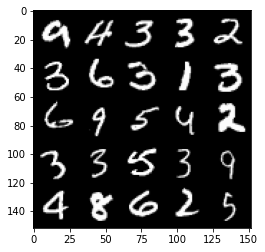

  0%|          | 0/469 [00:00<?, ?it/s]

Step26000: Generator loss:2.7956590323448216,Discriminator loss:0.2082855411618947


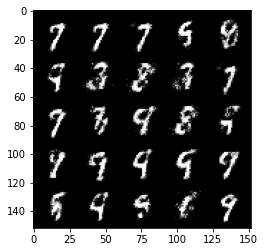

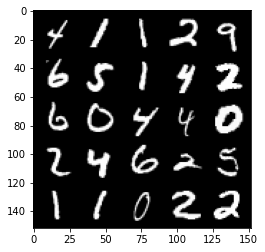

  0%|          | 0/469 [00:00<?, ?it/s]

Step26500: Generator loss:2.746832273483275,Discriminator loss:0.2035593806803227


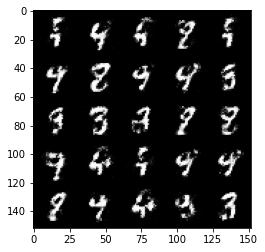

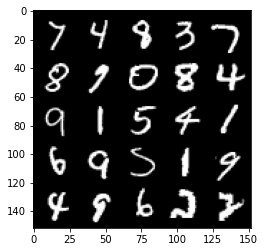

  0%|          | 0/469 [00:00<?, ?it/s]

Step27000: Generator loss:2.839691926479337,Discriminator loss:0.19380460684001474


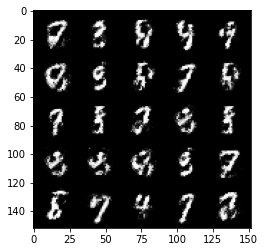

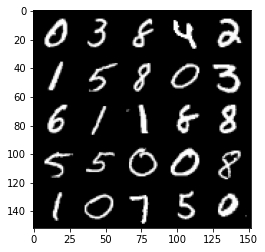

  0%|          | 0/469 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [26]:
cur_step=0
mean_generator_loss=0
mean_discriminator_loss=0
test_generator=True
gen_loss=False
error=False
for epoch in range(n_epochs):
    for real,_ in tqdm(dataloder):
        cur_batch_size=len(real)
        real=real.view(cur_batch_size,-1).to(device)
        disc_opt.zero_grad()
        disc_loss=get_disc_loss(gen,disc,criterion,real,cur_batch_size,z_dim,device)
        disc_loss.backward(retain_graph=True)
        disc_opt.step()
        
        gen_opt.zero_grad()
        gen_loss=get_gen_loss(gen,disc,criterion,cur_batch_size,z_dim,device)
        gen_loss.backward(retain_graph=True)
        gen_opt.step()
        
        mean_discriminator_loss+= disc_loss.item()/display_step
        mean_generator_loss+=gen_loss.item()/display_step
        
        if cur_step % display_step==0 and cur_step>0:
            print(f"Step{cur_step}: Generator loss:{mean_generator_loss},Discriminator loss:{mean_discriminator_loss}")
            fake_noise=get_noise(cur_batch_size,z_dim,device=device)
            fake=gen(fake_noise)
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss=0
            mean_discriminator_loss=0
        cur_step+=1
        
    